In [7]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('bmw_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_excel('bmw.xlsx', sheet_name='bmw')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,X1,2017,18500,Semi-Auto,12160,Diesel,145,65.7,2.0
2,3 Series,2017,18300,Semi-Auto,20000,Diesel,150,62.8,2.0
3,1 Series,2019,29398,Semi-Auto,9983,Petrol,145,39.8,3.0
4,3 Series,2018,22998,Semi-Auto,16360,Diesel,145,57.7,2.0
...,...,...,...,...,...,...,...,...,...
842,1 Series,2017,13500,Manual,16423,Diesel,150,72.4,1.5
843,1 Series,2016,8800,Manual,51002,Diesel,0,83.1,1.5
844,1 Series,2015,16314,Manual,17846,Petrol,300,35.3,3.0
845,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             847 non-null    object 
 1   year              847 non-null    int64  
 2   price             847 non-null    int64  
 3   type              847 non-null    object 
 4   distance          847 non-null    int64  
 5   fuel              847 non-null    object 
 6   tax               847 non-null    int64  
 7   miles per galoon  847 non-null    float64
 8   size              847 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 59.7+ KB


В датасет нет пропущенных знaчений

In [10]:
df.isnull().sum()

model               0
year                0
price               0
type                0
distance            0
fuel                0
tax                 0
miles per galoon    0
size                0
dtype: int64

In [11]:
df.dtypes

model                object
year                  int64
price                 int64
type                 object
distance              int64
fuel                 object
tax                   int64
miles per galoon    float64
size                float64
dtype: object

In [12]:
df.describe()

,year,price,distance,tax,miles per galoon,size
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2017.055490,21384.710744,24738.099174,129.085006,56.356789,2.170956
std,1.707442,9754.114902,19964.972481,55.414470,15.909320,0.509050
min,2013.000000,6998.000000,10.000000,0.000000,31.400000,1.500000
25%,2016.000000,14991.000000,9007.000000,125.000000,48.700000,2.000000
50%,2017.000000,19000.000000,20001.000000,145.000000,54.300000,2.000000
75%,2019.000000,24944.000000,35618.000000,150.000000,62.800000,2.000000
max,2020.000000,74990.000000,96213.000000,305.000000,156.900000,3.000000


In [13]:
df.columns

Index(['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size'],
      dtype='object')

In [14]:
df.columns = ['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size']

In [15]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std()
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std()
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [16]:
df = outliers(df)
df.describe()

,year,price,distance,tax,miles per galoon,size
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2017.055490,21202.038959,24695.637662,129.029464,55.626494,2.170956
std,1.707442,9043.637895,19827.618230,55.244498,12.438446,0.509050
min,2013.000000,6998.000000,10.000000,0.000000,31.400000,1.500000
25%,2016.000000,14991.000000,9007.000000,125.000000,48.700000,2.000000
50%,2017.000000,19000.000000,20001.000000,145.000000,54.300000,2.000000
75%,2019.000000,24944.000000,35618.000000,150.000000,62.800000,2.000000
max,2020.000000,50647.055451,84633.016616,295.328415,104.084750,3.000000


In [17]:
df.shape

(847, 9)

In [18]:
df['type'].nunique()

3

In [19]:
for col in df:
    print(df['type'].unique())

['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']
['Automatic' 'Semi-Auto' 'Manual']


In [20]:
#encoding transmission
from sklearn import preprocessing
df['type'] = preprocessing.LabelEncoder().fit_transform(df['type'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,5 Series,2014,11200.0,0,67068.0,Diesel,125.0,57.6,2.0
1,X1,2017,18500.0,2,12160.0,Diesel,145.0,65.7,2.0
2,3 Series,2017,18300.0,2,20000.0,Diesel,150.0,62.8,2.0
3,1 Series,2019,29398.0,2,9983.0,Petrol,145.0,39.8,3.0
4,3 Series,2018,22998.0,2,16360.0,Diesel,145.0,57.7,2.0


К числовому формату привели фактор type

In [21]:
df['fuel'].nunique()

4

In [22]:
for col in df:
    print(df['fuel'].unique())

['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']
['Diesel' 'Petrol' 'Hybrid' 'Other']


In [23]:
#encoding fuel
from sklearn import preprocessing
df['fuel'] = preprocessing.LabelEncoder().fit_transform(df['fuel'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,5 Series,2014,11200.0,0,67068.0,0,125.0,57.6,2.0
1,X1,2017,18500.0,2,12160.0,0,145.0,65.7,2.0
2,3 Series,2017,18300.0,2,20000.0,0,150.0,62.8,2.0
3,1 Series,2019,29398.0,2,9983.0,3,145.0,39.8,3.0
4,3 Series,2018,22998.0,2,16360.0,0,145.0,57.7,2.0


К числовому формату привели фактор fuel

In [24]:
df['model'].nunique()

20

In [25]:
for col in df:
    print(df['model'].unique())

['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 'X5' '7 Series' '8 Series' 'Z4' 'X6' 'X7' 'M4' 'M2' 'M3'
 'i8']
['5 Series' 'X1' '3 Series' '1 Series' '2 Series' '4 Series' 'X4' 'X3'
 'X2' '6 Series' 

In [26]:
#encoding body
from sklearn import preprocessing
df['model'] = preprocessing.LabelEncoder().fit_transform(df['model'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2014,11200.0,0,67068.0,0,125.0,57.6,2.0
1,11,2017,18500.0,2,12160.0,0,145.0,65.7,2.0
2,2,2017,18300.0,2,20000.0,0,150.0,62.8,2.0
3,0,2019,29398.0,2,9983.0,3,145.0,39.8,3.0
4,2,2018,22998.0,2,16360.0,0,145.0,57.7,2.0
5,1,2016,10600.0,1,24313.0,0,0.0,74.3,1.5
6,3,2020,29500.0,2,17.0,0,145.0,60.1,2.0
7,4,2019,30000.0,0,10654.0,0,145.0,60.1,2.0
8,14,2019,33998.0,2,7272.0,0,150.0,42.8,2.0
9,0,2020,29998.0,2,934.0,0,150.0,48.7,2.0


К числовому формату привели фактор model

In [27]:
df.dtypes

model                 int32
year                  int64
price               float64
type                  int32
distance            float64
fuel                  int32
tax                 float64
miles per galoon    float64
size                float64
dtype: object

# Визуализация факторов

<AxesSubplot:ylabel='Frequency'>

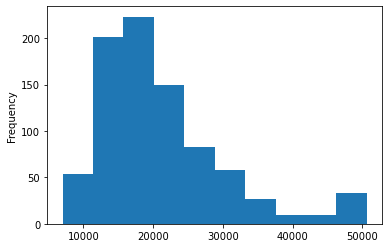

In [28]:
df['price'].plot(kind = 'hist')

Для большиства моделей цена варьируется от 12 до 25 тыс. у.е.

<AxesSubplot:ylabel='Frequency'>

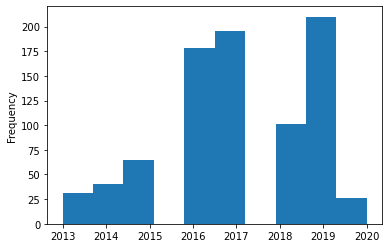

In [29]:
df['year'].plot(kind = 'hist')

Большинство моделей 2016,2017 и 2019 года выпуска

<AxesSubplot:ylabel='Frequency'>

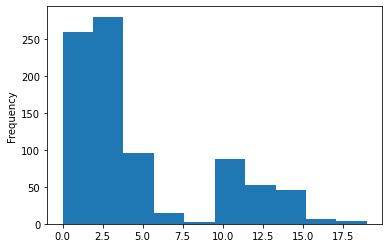

In [30]:
df['model'].plot(kind = 'hist')

Самая распространенная модель 3 Series, 5 Series, X1

<AxesSubplot:ylabel='Frequency'>

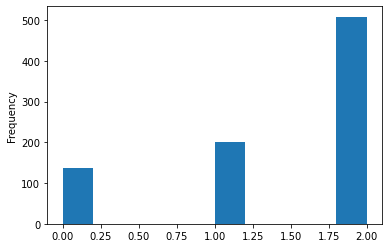

In [31]:
df['type'].plot(kind = 'hist')

Самая распространенная коробка передач - Manual

<AxesSubplot:ylabel='Frequency'>

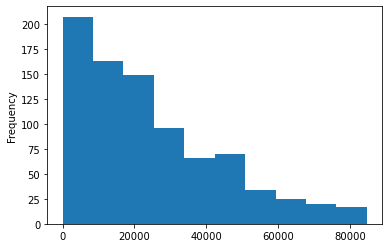

In [32]:
df['distance'].plot(kind = 'hist')

Большинство автомобилей имеют пробег до 25 тыс. км

<AxesSubplot:ylabel='Frequency'>

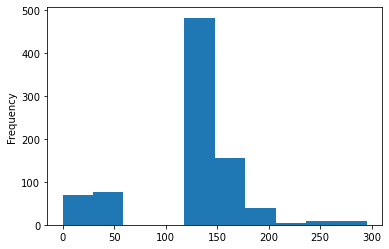

In [33]:
df['tax'].plot(kind = 'hist')

реимущественное большиство моделей выборки имеют налог 125-150 у.е.

<AxesSubplot:ylabel='Frequency'>

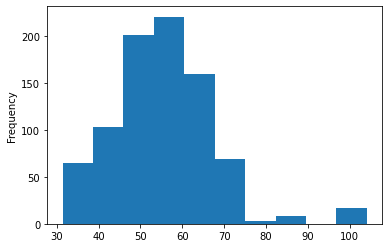

In [34]:
df['miles per galoon'].plot(kind = 'hist')

Большинство моделей имеют расход топлива 45-60 миль на галлон

<AxesSubplot:ylabel='Frequency'>

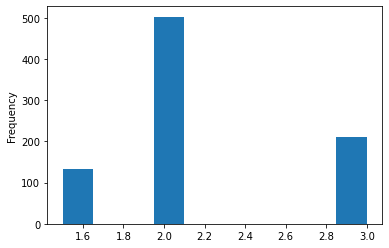

In [35]:
df['size'].plot(kind = 'hist')

Самый распространенный объем двигателя - 2.0 л

In [37]:
df.to_csv('bmw1.csv', sep=',', index=False)

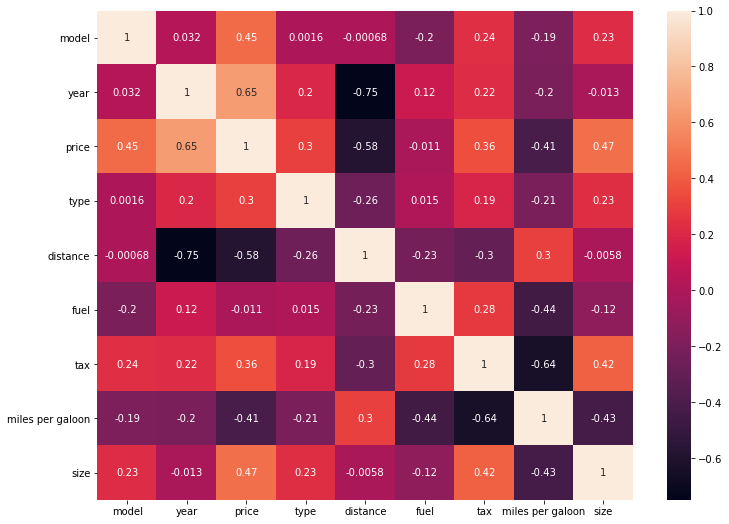

In [38]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшая корреляция между факторами Цена и Год

In [39]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,4.318772,2017.055490,21202.038959,1.436836,24695.637662,0.793388,129.029464,55.626494,2.170956
std,4.800996,1.707442,9043.637895,0.756665,19827.618230,1.307752,55.244498,12.438446,0.509050
min,0.000000,2013.000000,6998.000000,0.000000,10.000000,0.000000,0.000000,31.400000,1.500000
25%,1.000000,2016.000000,14991.000000,1.000000,9007.000000,0.000000,125.000000,48.700000,2.000000
50%,2.000000,2017.000000,19000.000000,2.000000,20001.000000,0.000000,145.000000,54.300000,2.000000
75%,5.500000,2019.000000,24944.000000,2.000000,35618.000000,3.000000,150.000000,62.800000,2.000000
max,19.000000,2020.000000,50647.055451,2.000000,84633.016616,3.000000,295.328415,104.084750,3.000000
